In [589]:
import numpy as np
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt

In [590]:
import os

In [591]:
os.listdir(r"/Users/cara/Downloads/Datasets") ## extract file

['other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-janjune-15.csv',
 'other-American_B01362.csv',
 'uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv',
 'other-Prestige_B01338.csv']

In [592]:
uber_15 = pd.read_csv(r"/Users/cara/Downloads/Datasets/uber-raw-data-janjune-15_sample.csv")
## Store dataframe to uber_15

In [593]:
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


In [594]:
uber_15.shape 
## The dataframe is made up of 100000 rows and 10 columns of data

(100000, 4)

In [595]:
## Data pre-processing/Data cleaning

In [596]:
uber_15.duplicated()
## Check if there is any duplicated values in the dataframe

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [597]:
uber_15.duplicated().sum()
## Calculate the sum of the duplicated values in the dataframe.

54

In [598]:
uber_15.drop_duplicates(inplace=True)
## Clean the duplicated values in the dataframe.

In [599]:
uber_15.duplicated().sum()
## Check again whether the duplicated value exists.

0

In [600]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [601]:
uber_15.isnull().sum()
## Check if there is any missing values. 
## As we see below, there is approximately 1116 values is missing.

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [602]:
uber_15['Pickup_date'][0]

'2015-05-02 21:43:00'

In [603]:
type(uber_15['Pickup_date'][0])
## Check to see what type of data 'Pickup_date' is.

str

In [604]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'])
## Convert data type to datetime, and update it.

In [605]:
uber_15['Pickup_date'].dtype

dtype('<M8[ns]')

In [606]:
## Analysing which month have max Uber Pickups

In [607]:
uber_15['Pickup_date'].dt.month_name() 
## Extract "month" data.

0            May
1        January
2          March
3          April
4          March
          ...   
99995      April
99996      March
99997      March
99998        May
99999       June
Name: Pickup_date, Length: 99946, dtype: object

In [608]:
uber_15['Month'] = uber_15['Pickup_date'].dt.month_name() 
## Store data to a new column. 

<Axes: >

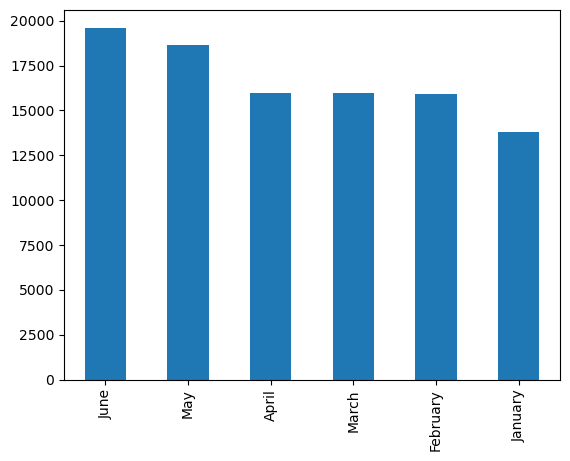

In [609]:
uber_15['Month'].value_counts().plot(kind='bar')
## Count the values of each month by using count(), and show the bar plot.

In [610]:
## As result, Uber has the max pickups in June.

In [611]:
uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minute'] =uber_15['Pickup_date'].dt.minute
## Add four new columns to the tables.

In [612]:
uber_15.head(4)
## Show the first 4 rows of the table.

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38


In [613]:
pivot = pd.crosstab(index=uber_15['Month'],columns=uber_15['weekday'])
## Create a privot table.

In [614]:
pivot

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


<Axes: xlabel='Month'>

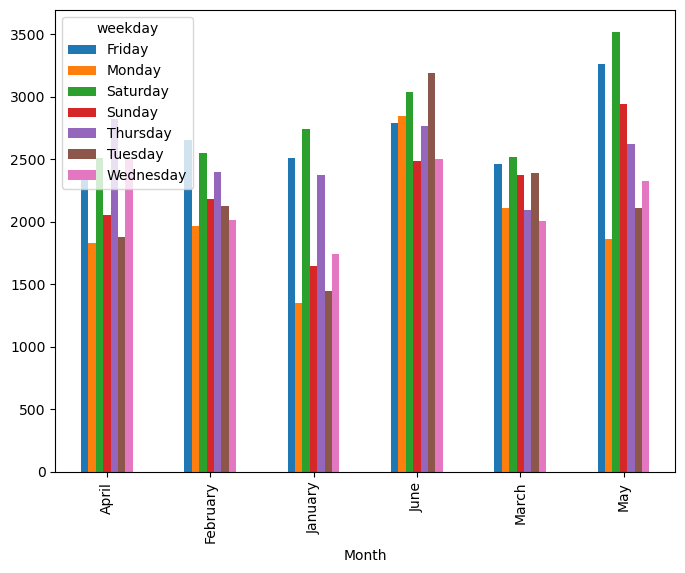

In [615]:
pivot.plot(kind = 'bar', figsize = (8,6))

In [616]:
## As we see in the plot, the number of pickup is relatively stable each day in June.

In [617]:
## Find out hourly rush in New York city at all days

In [618]:
summary = uber_15.groupby(['weekday','hour'], as_index = False).size()
## Extract the dataframe with the data we need for the plot.

In [619]:
summary

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


<Axes: xlabel='hour', ylabel='size'>

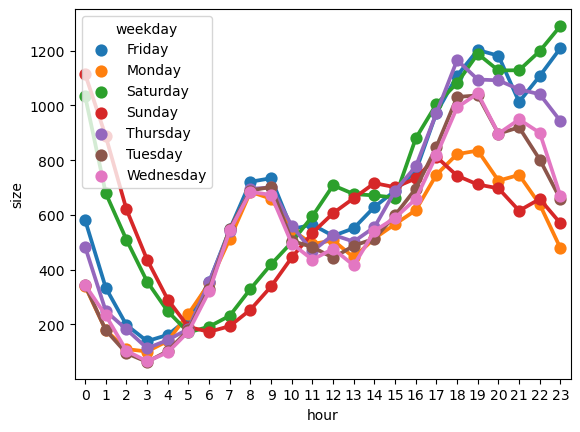

In [620]:
sns.pointplot(x = 'hour', y = 'size', hue = 'weekday', data = summary)
## Create a plot.

In [621]:
## As result, weekdays has the most demand during late evening. 
## And it is good to know from the plot that Thursday, Friday, and Saturdays have the similar trend during late night.

In [622]:
## Which base_number has the most number of Active Vehicles?

In [623]:
uber_foil = pd.read_csv(r"/Users/cara/Downloads/Datasets/Uber-Jan-Feb-FOIL.csv")

In [624]:
uber_foil

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


In [625]:
uber_foil.shape

(354, 4)

In [626]:
uber_foil.head(3)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421


In [627]:
!pip install chart_studio
!pip install plotly
## Install chart studio adn plotly.

In [628]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [629]:
init_notebook_mode(connected=True)

In [630]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [631]:
px.box(x='dispatching_base_number', y='active_vehicles', data_frame = uber_foil)

In [632]:
##As we see in the box plot, B02764 has the most number of active vehicles.

In [633]:
## Data collection.

In [634]:
os.listdir(r"/Users/cara/Downloads/Datasets")

['other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-janjune-15.csv',
 'other-American_B01362.csv',
 'uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv',
 'other-Prestige_B01338.csv']

In [635]:
files = os.listdir(r"/Users/cara/Downloads/Datasets")[7:19]

In [636]:
files

['uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv']

In [637]:
files.remove('Uber-Jan-Feb-FOIL.csv')

In [638]:
files

['uber-raw-data-apr14.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv']

In [639]:
files.remove('other-Highclass_B01717.csv')

In [640]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv']

In [641]:
files.remove('other-Federal_02216.csv')
files.remove('other-Carmel_B00256.csv')
files.remove('other-Diplo_B01196.csv')
files.remove('other-Dial7_B00887.csv')
## Remove the files are not used for anlaysis. 

In [642]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv']

In [643]:
final = pd.DataFrame()
path = r"/Users/cara/Downloads/Datasets"
for file in files :
    current_df = pd.read_csv(path+ '/' +file)
    final = pd.concat([current_df, final])
    
## Create dataframe for final files we need.

In [644]:
final.shape

(4534327, 4)

In [645]:
final.duplicated().sum() ## Find out the duplicates.

82581

In [646]:
final.drop_duplicates(inplace=True) ## Remove duplicates.

In [647]:
final.shape

(4451746, 4)

In [648]:
final.head(3)

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512


In [649]:
## At what locations of New York City we are getting rush?

In [650]:
rush_uber = final.groupby(['Lat', 'Lon'], as_index = False).size()
## Recreate a dataframe for heatmap plot.

In [651]:
rush_uber.head(6)

,Lat,Lon,size
0,39.6569,-74.2258,1
1,39.6686,-74.1607,1
2,39.7214,-74.2446,1
3,39.8416,-74.1512,1
4,39.9055,-74.0791,1
5,39.9196,-74.1112,1


In [652]:
!pip install folium ## Install folium

In [653]:
import folium

In [654]:
basemap = folium.Map() ## Import the basemap.

In [655]:
basemap

In [656]:
from folium.plugins import HeatMap ## Import HeatMap

In [657]:
HeatMap(rush_uber).add_to(basemap)

In [658]:
basemap

In [659]:
## As we see in the heatmap, the midtown Manhattan is clearly a huge bright. 
## The bright area are also made from midtown to lower Manhattan, followed by upper Manhattan to the height.

In [ ]:
## Examine rush on Hour and Weekday (perform Pair wise analysis)

In [ ]:
final.columns

In [ ]:
final.head(3)

In [ ]:
final.dtypes

In [664]:
final['Date/Time'] = pd.to_datetime(final['Date/Time'], format = "%m/%d/%Y %H:%M:%S")
## Change date time data type to numberal type.

In [665]:
final['Date/Time'].dtype

dtype('<M8[ns]')

In [666]:
final['Day'] = final['Date/Time'].dt.day
final['Hour'] = final['Date/Time'].dt.hour

In [667]:
final.head(3)

,Date/Time,Lat,Lon,Base,Day,Hour
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512,1,0
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512,1,0
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512,1,0


In [668]:
def gen_pivot_table(df, col1, col2):
    pivot = final.groupby([col1, col2]).size().unstack()
    return pivot.style.background_gradient()
## Create gradient pivot table function.

In [669]:
gen_pivot_table(final, "Day", "Hour")

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203
